In [1]:
import pandas as pd
import seaborn as sns
import folium


# Abrimos los Data Ya limpios

In [2]:
data_comple=pd.read_csv("../03 - CSV para el modelo/Datos_Completos.csv")


In [3]:
data_comple.dropna(subset=["category"], inplace=True)

In [4]:
data_comple.head(1)

,Unnamed: 0,latitude,longitude,category,name,Estado,avg_rating,num_of_reviews,text
0,0,33.381416,-86.80704,Pizza restaurant,California Pizza Kitchen at Riverchase Galleria,Alabama,4.1,18,NaN


In [5]:
Population=pd.read_csv("../02 - Data_tratados/Population_limpio.csv")

In [6]:
Population.head(1)

,State,Total population,Categoría de densidad
0,Alabama,5039877,Mediana


# Elegimos la catergoria entre Mayor, Mediana y Baja Poblacion


In [7]:
popu= "Baja"
fun1=Population[Population['Categoría de densidad'] == popu]
fun1.head()



,State,Total population,Categoría de densidad
1,Alaska,732673,Baja
7,Delaware,1003384,Baja
8,District of Columbia,670050,Baja
11,Hawaii,1441553,Baja
12,Idaho,1900923,Baja


# Elegimos estado para buscar informacion

,index,category
0,Chinese restaurant,23
1,Pizza restaurant,22
2,Mexican restaurant,22
3,"Cafe, Breakfast restaurant, Coffee shop, Desse...",20
4,Indian restaurant,19


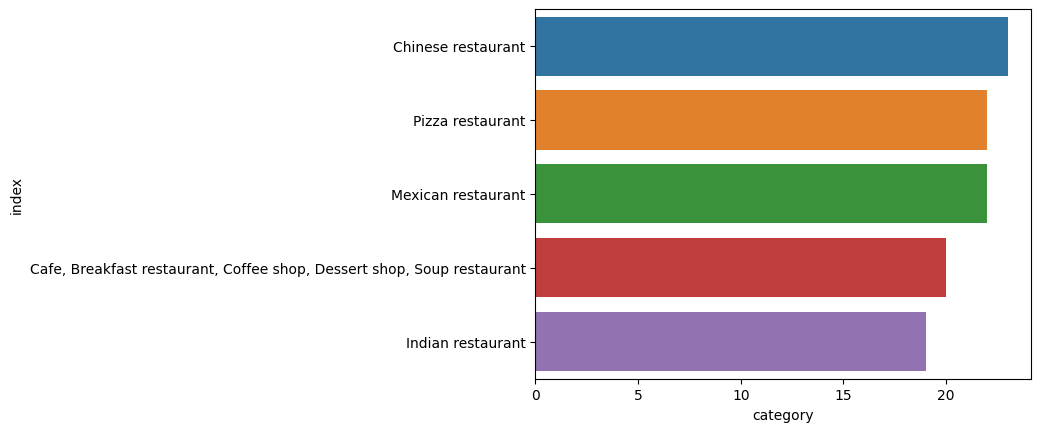

In [53]:
estado="Delaware"
df=data_comple[data_comple['Estado'] == estado]
Categorias=pd.DataFrame(df['category'].value_counts().head(5).reset_index())
sns.barplot(x='category', y='index', data=Categorias)
Categorias


In [ ]:
# Datos de ejemplo
latitudes =df["latitude"]
longitudes = df["longitude"]

# Crear el mapa centrado en las coordenadas promedio
mapa = folium.Map(location=[sum(latitudes)/len(latitudes), sum(longitudes)/len(longitudes)], zoom_start=5)

# Agregar marcadores al mapa
for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon]).add_to(mapa)

# Mostrar el mapa
mapa

In [9]:
len(list(df["name"].unique()))

304

# Elegimos la categoria

,index,name
0,Papa John's Pizza,8
1,Bernie's the Original Italian Water Ice,3
2,Mama Mia pizza and grill,1
3,Star Pizza,1
4,Pizza King,1


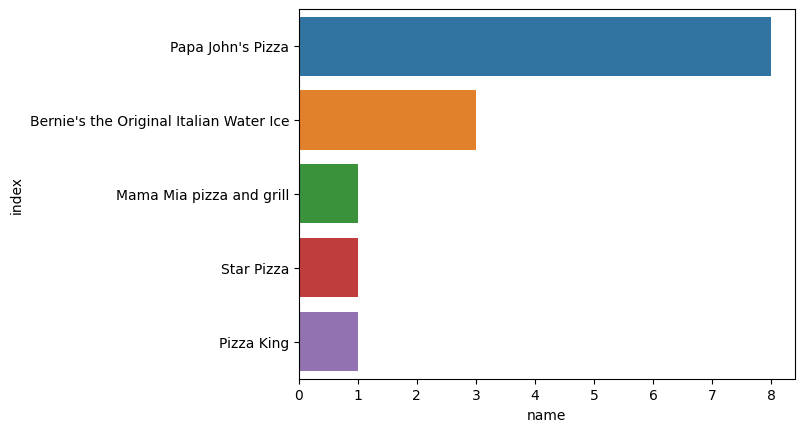

In [10]:
categori=df[df["category"] == 'Pizza restaurant']
conteo=pd.DataFrame(categori['name'].value_counts().head(5).reset_index())
sns.barplot(y='index', x='name', data=conteo)
conteo

In [ ]:
latitudes =categori["latitude"]
longitudes = categori["longitude"]

# Crear el mapa centrado en las coordenadas promedio
mapa = folium.Map(location=[sum(latitudes)/len(latitudes), sum(longitudes)/len(longitudes)], zoom_start=5)

# Agregar marcadores al mapa
for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon]).add_to(mapa)

# Mostrar el mapa
mapa

In [ ]:
import folium

# Datos de ejemplo
latitudes =categori["latitude"]
longitudes = categori["longitude"]

# Crear el mapa centrado en las coordenadas promedio
mapa = folium.Map(location=[sum(latitudes)/len(latitudes), sum(longitudes)/len(longitudes)], zoom_start=5)

# Agregar marcadores al mapa
for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon]).add_to(mapa)

# Mostrar el mapa
mapa


# Franquicias del Estados

,index,name
0,The Perfect Cup Cafe,20
1,Subway,19
2,Wawa,15
3,India Grille,15
4,King Garden Restaurant,15


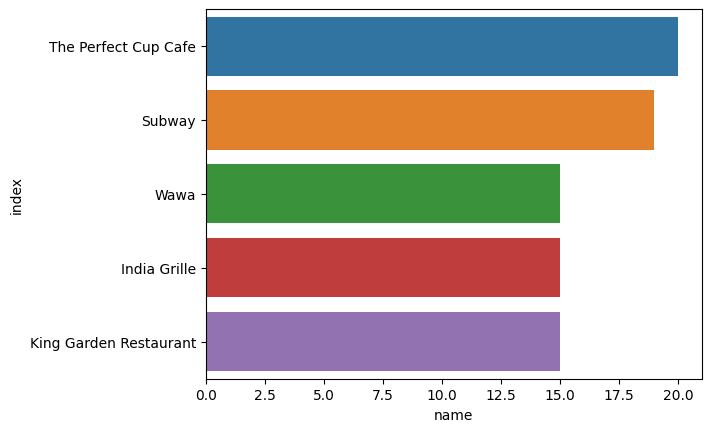

In [11]:

Franquicias=pd.DataFrame(df['name'].value_counts().head(5).reset_index())
sns.barplot(x='name', y='index', data=Franquicias)
Franquicias

# Puntuacion y comentarios

In [82]:
yelp=df[df['name'] == 'Subway']
Comentarios=pd.DataFrame(yelp["text"].head(25))
Comentarios.dropna(inplace=True)
Comentarios=Comentarios.head(1)
Puntuacion=pd.DataFrame(yelp[["avg_rating","num_of_reviews"]])
#conteo=pd.DataFrame(categori['name'].value_counts().head(5).reset_index())
#sns.barplot(y='index', x='name', data=conteo)
#conteo
Puntuacion.head()


,avg_rating,num_of_reviews
15752,3.6,18
15763,3.3,28
15779,3.5,48
15797,4.3,68
15821,3.3,25


# Comentarios

In [85]:
Comentarios

,text
15990,Good spot! Call in advance and place your orde...


In [86]:
Comentarios['text'] = Comentarios['text'].str.split(',')
Comentarios= Comentarios.explode('text')
Comentarios

,text
15990,Good spot! Call in advance and place your orde...
